## Imports

In [ ]:
!pip install ipyvolume

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
from PIL import Image
import os
import numpy as np
import pandas as pd
import re
import gc
import ipyvolume as ipv
import numpy
import platform
import glob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras.utils import Sequence

import imgaug.augmenters as iaa

from sklearn.metrics import confusion_matrix
import seaborn as sns


import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Processing: 3D Brain Modeling (Don't need to run again)

In [ ]:
!cp "/content/drive/My Drive/207_Project/oasis.zip" "./"

In [ ]:
'''

!cp "/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/oasis.zip" "./"

'''

'\n\n!cp "/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/oasis.zip" "./"\n\n'

In [ ]:
# !unzip oasis.zip

In [ ]:
def load_and_optimize_image(path, size=(128, 128), convert_gray=True):
    """
    Load an image, convert it to grayscale, resize it, and convert to a numpy array.
    :param path: Path to the image file.
    :param size: New size as a tuple (width, height) to resize the image. None to skip resizing.
    :param convert_gray: Convert the image to grayscale.
    :return: Numpy array of the optimized image.
    """

    with Image.open(path) as img:
        if convert_gray:
            img = img.convert('L')  # Convert to grayscale
        if size:
            img = img.resize(size)  # Resize image
        return np.array(img, dtype=np.uint8)  # Use uint8 to save memory

print("Function for image loading and optimization is defined.")

Function for image loading and optimization is defined.


In [ ]:
base_dir = './Data'
pattern = re.compile(r"OAS1_(\d+)_MR1_mpr-\d+_(\d+).jpg")

# Dictionary for brain scans
brain_scans = {}

# Loop through categories and load images
for category in ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']:
    category_path = os.path.join(base_dir, category)
    for filename in os.listdir(category_path):
        match = pattern.match(filename)
        if match:
            brain_id = match.group(1)
            scan_num = int(match.group(2))
            if brain_id not in brain_scans:
                brain_scans[brain_id] = []
            image_path = os.path.join(category_path, filename)
            optimized_image = load_and_optimize_image(image_path)
            brain_scans[brain_id].append((scan_num, optimized_image))


KeyboardInterrupt: 

In [ ]:
processed_dir = '/content/drive/My Drive/207_Project/Processed'
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

In [ ]:
# Sort, stack, and save images for each brain
for brain_id, scans in brain_scans.items():
    sorted_scans = sorted(scans, key=lambda x: x[0])
    volume = np.stack([image for _, image in sorted_scans], axis=-1)

    # Define the memmap path and shape
    memmap_path = f'/content/drive/My Drive/207_Project/Processed/{brain_id}.dat'
    volume_memmap = np.memmap(memmap_path, dtype='uint8', mode='w+', shape=volume.shape)
    volume_memmap[:] = volume[:]
    del volume, volume_memmap
    gc.collect()

print("Images processed and saved as memmap.")


## Categorical Mappings

In [ ]:
## for Jun
!cp "/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/oasis.zip" "./"

cp: cannot stat '/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/oasis.zip': No such file or directory


In [ ]:
!cp "/content/drive/My Drive/207_Project/oasis.zip" "./"

In [ ]:
!unzip oasis.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_112.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_113.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_114.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_115.jpg  
  inflating

In [ ]:
# Base directory where the Data folder is located
base_dir = './Data'

categories = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# Dictionary to hold image paths grouped by brain identifier
category_to_brain = {}

# Regular expression to extract the brain identifier and scan number
pattern = re.compile(r"OAS1_(\d+)_MR1_mpr-\d+_(\d+).jpg")

# Loop through each category and each image file
for category in ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']:
    category_path = os.path.join(base_dir, category)
    brain_scans = {}
    for filename in os.listdir(category_path):
        match = pattern.match(filename)
        if match:
            brain_id = match.group(1)
            scan_num = int(match.group(2))
            if brain_id not in brain_scans:
                brain_scans[brain_id] = []
            # Load the image here and store the PIL Image object
            image_path = os.path.join(category_path, filename)
            brain_scans[brain_id].append((scan_num, Image.open(image_path)))
            brain_scans[brain_id].sort(key=lambda x: x[0])
    category_to_brain[category] = brain_scans

In [ ]:
# probably update the below code later to pull the ids from the .dat files instead of npy, but it gave me a blank array and I didnt feel like spending the time to find out why

In [ ]:
# Directory containing the .npy files

## use second directory_path and comment out the first directory_path
#directory_path = '/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/Processed_old/'
directory_path = '/content/drive/My Drive/207_Project/Processed_old/'

# Pattern to match the numbers in the filenames
pattern = r'(\d+)\.npy$'

# List all .npy files in the directory
npy_files = glob.glob(os.path.join(directory_path, '*.npy'))

# Extract numbers from each file's name
numbers = []
for file_path in npy_files:
    # Extract the filename from the path
    filename = os.path.basename(file_path)
    # Search for the pattern and extract the number
    match = re.search(pattern, filename)
    if match:
        number = match.group(1)
        numbers.append(number)

print(numbers)

['0056', '0028', '0382', '0137', '0031', '0373', '0223', '0052', '0185', '0122', '0035', '0269', '0278', '0053', '0134', '0291', '0067', '0268', '0184', '0073', '0316', '0308', '0351', '0047', '0130', '0113', '0275', '0220', '0133', '0026', '0299', '0350', '0340', '0119', '0088', '0354', '0078', '0369', '0081', '0043', '0062', '0313', '0255', '0228', '0189', '0188', '0138', '0153', '0301', '0182', '0375', '0169', '0261', '0064', '0213', '0061', '0058', '0232', '0160', '0379', '0311', '0040', '0368', '0295', '0029', '0147', '0231', '0341', '0280', '0266', '0353', '0332', '0333', '0080', '0091', '0069', '0271', '0038', '0357', '0356', '0111', '0207', '0181', '0222', '0167', '0136', '0054', '0253', '0162', '0202', '0049', '0095', '0376', '0009', '0293', '0328', '0112', '0065', '0079', '0283', '0092', '0106', '0017', '0323', '0126', '0087', '0282', '0101', '0072', '0342', '0277', '0199', '0239', '0260', '0068', '0090', '0221', '0355', '0037', '0004', '0057', '0145', '0197', '0209', '0241',

In [ ]:
# Map categories to IDs
category_to_id = {category: list(brains.keys()) for category, brains in category_to_brain.items()}

In [ ]:
# Reverse mapping: ID to category
id_to_category = {id: category for category, ids in category_to_id.items() for id in ids}

In [ ]:
# Find categories for each ID based on the processed files
mapped_cats = [id_to_category[id] for id in numbers if id in id_to_category]

## Loading .npys & mapping categories

In [ ]:
def load_memmap_data(file_path, shape):
    """
    Load data from a memmap file.
    :param file_path: Path to the memmap file.
    :param shape: The shape of the data to load.
    :return: Numpy memmap array of the data.
    """
    return np.memmap(file_path, dtype='uint8', mode='r', shape=shape)

print("Function for loading data from memmap is defined.")

Function for loading data from memmap is defined.


In [ ]:
x_volumes = []
y_volumes = []

for id, category in id_to_category.items():
    ## run the second file_path line and comment out the first file_path line
    #file_path = f"/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/Processed/{id}.dat"
    file_path = f"/content/drive/My Drive/207_Project/Processed/{id}.dat"
    brain_volume = load_memmap_data(file_path, (122, 128, 128))

    '''
    # I dont know why the shape is 122 x ... I expected = 183 * 128 * 128 . I just guessed and checked
    file_path = '/content/drive/My Drive/207_Project/Processed/0273.dat'
    file_size = os.path.getsize(file_path)
    expected_size = 183 * 128 * 128
    print(f"File size: {file_size} bytes, Expected size: {expected_size} bytes")
    '''

    x_volumes.append(brain_volume)
    y_volumes.append(category)


## Baseline Model (CNN)

### Data Prep & Splitting

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_volumes)
encoded_labels_dict = dict(zip(numbers, y_encoded))

In [ ]:
pd.Series(np.array(y_encoded)).value_counts()

2    266
3     58
0     21
1      2
Name: count, dtype: int64

In [ ]:
class BrainScanDataGenerator(Sequence):
    def __init__(self, ids, labels, batch_size=4, dim=(122, 128, 128), n_channels=1, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.ids = ids
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        # Calculates the number of batches per epoch
        return int(np.floor(len(self.ids) / self.batch_size))

    def __getitem__(self, index):
        # Generates one batch of data
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_ids_temp = [self.ids[k] for k in indexes]
        X, y = self.__data_generation(list_ids_temp)
        return X, y



    def on_epoch_end(self):
        # Updates indexes after each epoch
        self.indexes = np.arange(len(self.ids))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_ids_temp):
        # Generates data containing batch_size samples
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        for i, ID in enumerate(list_ids_temp):
            # Use ID directly without formatting if it's already a string
            #data_path = f'/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/Processed/{ID}.dat'
            data_path = f'/content/drive/My Drive/207_Project/Processed/{ID}.dat'
            # Load and preprocess the data here
            X[i,] = load_memmap_data(data_path, self.dim).reshape(*self.dim, self.n_channels) / 255.0
            y[i] = self.labels[ID]
        return X, np.array(y)

In [ ]:
train_ids, test_ids, train_labels, test_labels = train_test_split(
    numbers,
    [id_to_category[id_] for id_ in numbers],  # This constructs a list of labels for the IDs in 'numbers'
    test_size=0.2, #Only using 20% of the dataset cause time, but I think we can increase this later if the model gives us useful results (or we may not need to)
    stratify=[id_to_category[id_] for id_ in numbers],
    random_state=77
)

In [ ]:
gc.collect()

116

In [ ]:
train_generator = BrainScanDataGenerator(train_ids, {id_: encoded_labels_dict[id_] for id_ in train_ids}, batch_size=4)
test_generator = BrainScanDataGenerator(test_ids, {id_: encoded_labels_dict[id_] for id_ in test_ids}, batch_size=4)

### Model Building & Training (CNN #1)

In [ ]:
input_shape = (122, 128, 128, 1)
num_classes = 4

In [ ]:
def build_custom_cnn_3d(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling3D((2, 2, 2)),
        layers.Conv3D(64, (3, 3, 3), activation='relu'),
        layers.MaxPooling3D((2, 2, 2)),
        layers.Conv3D(64, (3, 3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_custom_cnn_3d(input_shape, num_classes)



In [ ]:
# Calculate steps per epoch for training and validation
train_steps = len(train_generator)
validation_steps = len(test_generator)

In [ ]:
# Fit the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=test_generator,
    validation_steps=validation_steps,
    epochs=5
)

In [ ]:
'''

model_save_path = '/content/drive/My Drive/207_Project/3d_brain_baseline_cnn'
model.save(model_save_path)

'''

In [ ]:
# To load the model later...

from tensorflow.keras.models import load_model

#model_load_path = '/content/drive/My Drive/Spring 2024/DATASCI 207/207_Project/3d_brain_baseline_cnn'
model_load_path = '/content/drive/My Drive/207_Project/3d_brain_baseline_cnn'

# Load the model
model = load_model(model_load_path)

In [ ]:
gc.collect()

In [ ]:

# Make predictions on the test data
y_pred = model.predict(test_generator)

# Get the true labels from the test generator
y_true = np.concatenate([test_generator[i][1] for i in range(len(test_generator))])

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)


17/17 [==============================] - 181s 10s/step


In [ ]:

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

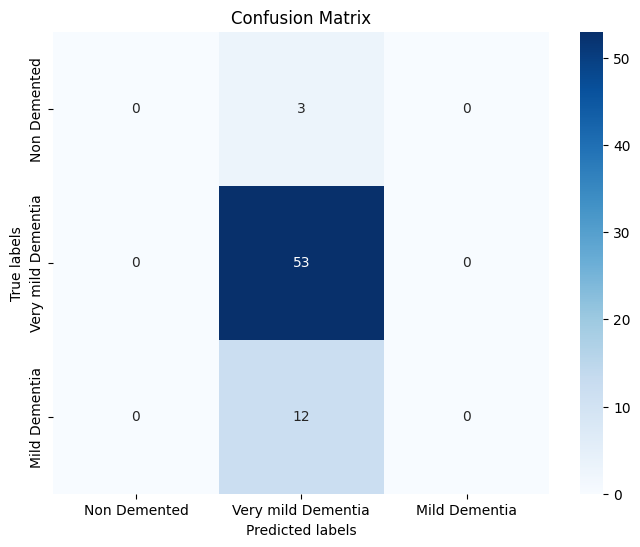

In [ ]:
class_labels = ['Non Demented', 'Very mild Dementia', 'Mild Dementia']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model
eval_results = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {eval_results[0]}")
print(f"Test Accuracy: {eval_results[1]}")


17/17 [==============================] - 197s 11s/step - loss: 0.7982 - accuracy: 0.7794
Test Loss: 0.7982257008552551
Test Accuracy: 0.779411792755127


In [ ]:
'''
y_volumes_series = pd.Series(y_volumes)
print(y_volumes_series.value_counts())
'''

In [ ]:
'''
pd.Series(y_true).value_counts()
'''

In [ ]:
# Need to balance the data :(

### CNN #2 (dem vs non dem)

In [ ]:
# Update id_to_category to binary mapping: 0 for 'Non Demented', 1 for any stage of Alzheimer's
binary_id_to_category = {id_: (0 if category == 'Non Demented' else 1) for id_, category in id_to_category.items()}

# Then use the binary mapping to encode labels
binary_labels = [binary_id_to_category[id_] for id_ in numbers]
binary_labels_encoded = LabelEncoder().fit_transform(binary_labels)
binary_encoded_labels_dict = dict(zip(numbers, binary_labels_encoded))

In [ ]:
train_generator_2 = BrainScanDataGenerator(train_ids, {id_: binary_encoded_labels_dict[id_] for id_ in train_ids}, batch_size=4)
test_generator_2 = BrainScanDataGenerator(test_ids, {id_: binary_encoded_labels_dict[id_] for id_ in test_ids}, batch_size=4)

In [ ]:
# This is now binary classification, i've put comments at the changes from our previous baseline model

def build_custom_cnn_3d_binary(input_shape):
    model = models.Sequential([
        layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling3D((2, 2, 2)),
        layers.Conv3D(64, (3, 3, 3), activation='relu'),
        layers.MaxPooling3D((2, 2, 2)),
        layers.Conv3D(64, (3, 3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid activation instead of softmax
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Change loss function to binary cross-entropy instead of sparse...
                  metrics=['accuracy'])
    return model

model_binary = build_custom_cnn_3d_binary(input_shape)

In [ ]:
train_steps_2 = len(train_generator_2)
validation_steps_2 = len(test_generator_2)

In [ ]:
history_binary = model_binary.fit(
    train_generator_2,
    steps_per_epoch=train_steps_2,
    validation_data=test_generator_2,
    validation_steps=validation_steps_2,
    epochs=2
)

In [ ]:
model_save_path_binary = '/content/drive/My Drive/207_Project/3d_brain_binary_cnn'
model_binary.save(model_save_path_binary)

In [ ]:
model_load_path = '/content/drive/My Drive/207_Project/3d_brain_binary_cnn'

# Load the model
model = load_model(model_load_path)

In [ ]:

# Make predictions on the test data
y_pred = model.predict(test_generator_2)

# Get the true labels from the test generator
y_true = np.concatenate([test_generator_2[i][1] for i in range(len(test_generator_2))])

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)


17/17 [==============================] - 194s 11s/step


In [ ]:

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

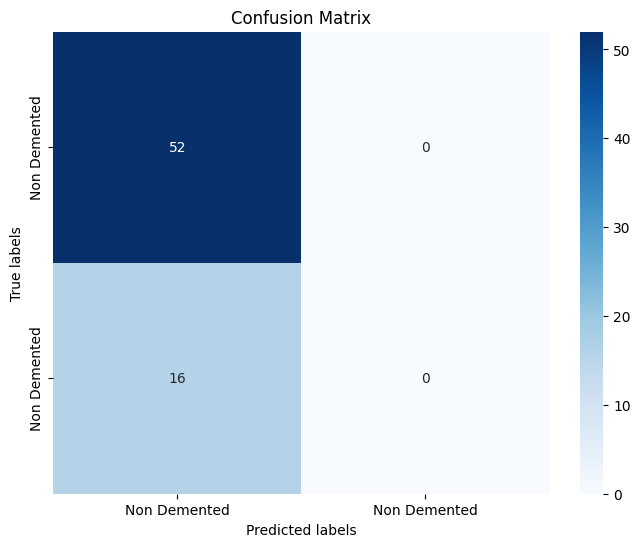

In [ ]:
class_labels = ['Non Demented', 'Non Demented']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model
eval_results = model.evaluate(test_generator_2, verbose=1)

print(f"Test Loss: {eval_results[0]}")
print(f"Test Accuracy: {eval_results[1]}")

17/17 [==============================] - 181s 11s/step - loss: 0.5505 - accuracy: 0.7647
Test Loss: 0.5505438446998596
Test Accuracy: 0.7647058963775635


### Data Augmentation

In [ ]:
gc.collect()

40397

In [ ]:
"""
Sampling creates 5 augmentations per colume. Doesn't balance the classes, but does increase data.
However, it treates each volume as a single image with height rather than a collection of slices. This is the worst case option.


from imgaug import augmenters as iaa
import numpy as np
import os
from PIL import Image

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:49: SuspiciousSingleImageShapeWarning:
You provided a numpy array of shape (122, 128, 128) as a single-image augmentation input,
which was interpreted as (H, W, C). The last dimension however has a size of >=32,
which indicates that you provided a multi-image array with shape (N, H, W) instead.

If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>).
Otherwise your multi-image input will be interpreted as a single image during augmentation.
  ia.warn(


"""

In [ ]:
"""
from imgaug import augmenters as iaa
import numpy as np
import os
from PIL import Image

# Define your augmenters
augmenters = [
    iaa.Affine(rotate=(-10, 10)),
    iaa.Affine(translate_px={"x": (-10, 10), "y": (-10, 10)}),
    iaa.Affine(scale=(0.9, 1.1)),
    iaa.Fliplr(1.0),
    iaa.AdditiveGaussianNoise(scale=0.02*255),
]

# Function to augment and save data for a specific class using np.memmap
def augment_and_save_class_data(class_label, num_augmentations_needed):
    save_path = f'/content/drive/My Drive/207_Project/Augment_Balance/{class_label}/'
    os.makedirs(save_path, exist_ok=True)

    class_ids = [file_id for file_id, label in id_to_category.items() if label == class_label]
    np.random.shuffle(class_ids)

    augmented_count = 0
    while augmented_count < num_augmentations_needed:
        for file_id in class_ids:
            if augmented_count >= num_augmentations_needed:
                break
            data_path = f'/content/drive/My Drive/207_Project/Processed/{file_id}.dat'
            volume = np.memmap(data_path, dtype='uint8', mode='r', shape=(122, 128, 128)).reshape((122, 128, 128))
            volume_aug = augment_volume_slice_by_slice(volume)
            augmented_file_path = os.path.join(save_path, f"{file_id}_aug_{augmented_count}.dat")

            # Create a memmap for the augmented data with 'w+' mode to write
            volume_memmap = np.memmap(augmented_file_path, dtype='uint8', mode='w+', shape=volume_aug.shape)
            volume_memmap[:] = volume_aug[:]
            del volume_memmap  # Ensure the data is written and the memmap is closed

            augmented_count += 1

# Loop through each file ID and its corresponding class label in id_to_category
for file_id, class_label in id_to_category.items():
    augment_and_save(file_id, class_label)


In [ ]:
from imgaug import augmenters as iaa
import numpy as np
import os

augmenter = iaa.Sequential([
    iaa.Affine(rotate=(-10, 10)),
    iaa.Affine(translate_px={"x": (-10, 10), "y": (-10, 10)}),
    iaa.Affine(scale=(0.9, 1.1)),
    iaa.Fliplr(1.0),
    iaa.AdditiveGaussianNoise(scale=0.02*255),
])

In [ ]:
# Calculate current samples per class from id_to_category
current_samples_per_class = {}
for class_label in id_to_category.values():
    if class_label in current_samples_per_class:
        current_samples_per_class[class_label] += 1
    else:
        current_samples_per_class[class_label] = 1

In [ ]:
# Determine upsizing needs
target_samples = 100
upsizing_needs = {class_label: max(0, target_samples - current_count)
                  for class_label, current_count in current_samples_per_class.items()}

In [ ]:
# Augment volumes slice-by-slice
def augment_volume_slice_by_slice(volume):
    aug_volume = np.zeros_like(volume)
    for z in range(volume.shape[0]):
        slice_2d = volume[z, :, :]
        slice_2d_aug = augmenter.augment_image(slice_2d)
        aug_volume[z, :, :] = slice_2d_aug
    return aug_volume

In [ ]:
# Function to augment and save data for a specific class using np.memmap
def augment_and_save_class_data(class_label, num_augmentations_needed):
    save_path = f'/content/drive/My Drive/207_Project/Augment_Balance/{class_label}/'
    os.makedirs(save_path, exist_ok=True)

    class_ids = [file_id for file_id, label in id_to_category.items() if label == class_label]
    np.random.shuffle(class_ids)

    # for seem reason it looped too much, so i've added this new code
    # Added: Check existing augmented files to avoid creating more than necessary.
    existing_aug_files = glob.glob(f'{save_path}/*.dat')
    existing_aug_count = len(existing_aug_files)

    if existing_aug_count >= num_augmentations_needed:
        print(f"Skipping {class_label}, already have {existing_aug_count} augmentations.")
        return  # Skip this class if no more augmentations are needed.

    # for seem reason it looped too much, so i've added this new code
    remaining_augmentations = num_augmentations_needed - existing_aug_count

    for file_id in class_ids:
        # Augment until the remaining_augmentations is depleted.
        while remaining_augmentations > 0:
            data_path = f'/content/drive/My Drive/207_Project/Processed/{file_id}.dat'
            volume = np.memmap(data_path, dtype='uint8', mode='r', shape=(122, 128, 128)).reshape((122, 128, 128))
            volume_aug = augment_volume(volume)  # Apply augmentations

            # Adjust file naming to account for possibly existing augmentations
            augmented_file_path = os.path.join(save_path, f"{file_id}_aug_{existing_aug_count + num_augmentations_needed - remaining_augmentations}.dat")

            # Save the augmented volume using .dat format
            volume_memmap = np.memmap(augmented_file_path, dtype='uint8', mode='w+', shape=volume_aug.shape)
            volume_memmap[:] = volume_aug[:]
            del volume_memmap  # Flush to disk and close the memmap

            remaining_augmentations -= 1


In [ ]:
'''
No need to run anymore



# Apply augmentations based on upsizing needs
for class_label, num_needed in upsizing_needs.items():
    if num_needed > 0:
        augment_and_save_class_data(class_label, num_needed)

'''

In [ ]:
gc.collect()

67

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Extract all class names from id_to_category
class_names = list(id_to_category.values())

# Initialize the encoder and fit it to the class names
encoder = LabelEncoder()
encoder.fit(class_names)

# Encode all class names in id_to_category to integers
id_to_encoded_label = {id_: encoder.transform([class_name])[0] for id_, class_name in id_to_category.items()}


In [ ]:
class AugmentedBrainScanDataGenerator(Sequence):
    def __init__(self, base_dir, labels, batch_size=4, dim=(122, 128, 128), n_channels=1, shuffle=True):
        self.base_dir = base_dir  # Base directory containing 'Processed' and 'Augment_balance'
        self.labels = labels  # Dictionary mapping IDs to their labels
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.data_paths, self.data_labels = self._get_data_paths_and_labels()
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.data_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.data_paths[index*self.batch_size:(index+1)*self.batch_size]
        batch_labels = [self.labels[os.path.basename(path).split('.')[0].split('_aug')[0]] for path in batch_paths]

        X = np.empty((self.batch_size, *self.dim, self.n_channels), dtype=np.float32)
        y = np.array(batch_labels, dtype=int)

        for i, path in enumerate(batch_paths):
            # Correcting the method call to the defined load_memmap_data
            volume = self.load_memmap_data(path, self.dim)  # Assuming this method correctly loads your .dat files
            X[i, ] = volume.astype(np.float32) / 255.0  # Normalize

        return X, y



    def on_epoch_end(self):
        if self.shuffle:
            # Shuffle the data paths and labels in unison
            zipped = list(zip(self.data_paths, self.data_labels))
            np.random.shuffle(zipped)
            self.data_paths, self.data_labels = zip(*zipped)

    def _get_data_paths_and_labels(self):
        data_paths = []
        data_labels = []

        # Assuming 'class_directories' is a dictionary mapping from folder names (class names) to integer labels
        # This assumes you have a predefined mapping of class names to their encoded integers
        class_directories = {
            'Mild Dementia': 0,
            'Moderate Dementia': 1,
            'Non Demented': 2,
            'Very mild Dementia': 3
        }

        # Handling original data
        for file_id, label in self.labels.items():
            path = os.path.join(self.base_dir, 'Processed', f'{file_id}.dat')
            if os.path.exists(path):  # Check if the file exists
                data_paths.append(path)
                data_labels.append(label)  # 'label' should already be an integer

        # Handling augmented data
        for class_name, label in class_directories.items():
            augmented_paths = glob.glob(os.path.join(self.base_dir, 'Augment_Balance', class_name, '*.dat'))
            for path in augmented_paths:
                data_paths.append(path)
                data_labels.append(label)  # Use the integer label for the class

        return data_paths, data_labels


    def load_memmap_data(self, file_path, shape):
        return np.memmap(file_path, dtype='uint8', mode='r', shape=shape).reshape(*shape, self.n_channels)

In [ ]:
base_dir = '/content/drive/My Drive/207_Project'


train_generator = AugmentedBrainScanDataGenerator(base_dir=base_dir, labels=id_to_encoded_label, batch_size=4)
test_generator = AugmentedBrainScanDataGenerator(base_dir=base_dir, labels=id_to_encoded_label, batch_size=4)


In [ ]:
def build_custom_cnn_3d(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling3D((2, 2, 2)),
        layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
        layers.MaxPooling3D((2, 2, 2)),
        layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

input_shape = (122, 128, 128, 1)
model = build_custom_cnn_3d(input_shape, num_classes)


In [ ]:
gc.collect()

1093

In [ ]:
num_classes = 4

model = build_custom_cnn_3d(input_shape, num_classes)

# Calculate steps per epoch for training and validation
train_steps = len(train_generator)
validation_steps = len(test_generator)

# Fit the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=test_generator,
    validation_steps=validation_steps,
    epochs=1 #change later
)

# Define a new path for saving the model
model_save_path = '/content/drive/My Drive/207_project/3d_brain_cnn_augmented'

# Save the model
model.save(model_save_path)


141/141 [==============================] - 7539s 54s/step - loss: 2.3780 - accuracy: 0.4450 - val_loss: 1.3218 - val_accuracy: 0.4699


## Augmenting Data

In [ ]:
from PIL import Image
import imgaug.augmenters as iaa

def rand_augment(augmenters):
  # Helper function to choose a random augmenter out of the 5 possible augmenters to apply to image x
  idx = np.random.randint(len(augmenters))
  augmenter = augmenters[idx][1]
  return augmenter

augmenters = [
    ('Rotation', iaa.Affine(rotate=(-10, 10)), "Helps model to be invariant to slight rotations."),
    ('Translation', iaa.Affine(translate_px={"x": (-5, 5), "y": (-5, 5)}), "Helps model to handle slight translations."),
    ('Scaling', iaa.Affine(scale=(0.9, 1.1)), "Helps model to generalize to different brain sizes."),
    ('Horizontal Flipping', iaa.Fliplr(1.0), "Can make the model more robust if condition isn't hemisphere-specific."),
    ('Noise Injection', iaa.AdditiveGaussianNoise(scale=0.02*255), "Simulates MRI scanner noise."),
]

In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np

class BrainScanDataGenerator(Sequence):
    # Initialization and other parts of the class remain unchanged

    def __init__(self, ids, labels, batch_size=4, dim=(122, 128, 128), n_channels=1, shuffle=True, augment=False):
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.ids = ids
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.augment = augment  # Control augmentation
        self.on_epoch_end()

    def __len__(self):
        # Calculates the number of batches per epoch
        return int(np.floor(len(self.ids) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_ids_temp = [self.ids[k] for k in indexes]
        X, y = self.__data_generation(list_ids_temp)
        return X, y

    def on_epoch_end(self):
        # Updates indexes after each epoch
        self.indexes = np.arange(len(self.ids))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def generate_rand_aug_config(self):
        # Placeholder for generating a random augmentation configuration
        # This function should return a config or seed that will be used by rand_augment
        # Example: return {'rotate': 45, 'flip': True}
        # The actual implementation will depend on how rand_augment is defined
        pass


    def rand_augment(self, slice, aug_config):
        # Your augmentation function that uses aug_config to apply transformations
        # Example: return apply_transformations(slice, aug_config)
        pass

    def __data_generation(self, list_ids_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        for i, ID in enumerate(list_ids_temp):

            data_path = f'/content/drive/My Drive/207_Project/Processed/{ID}.dat'
            volume = np.memmap(data_path, dtype=np.float32, mode='r', shape=self.dim)
            label = self.labels[ID]

            if self.augment and self.should_augment(label):
                augmented_volume = self.apply_selective_augmentation(volume, label)
            else:
                augmented_volume = volume

            X[i,] = augmented_volume.reshape(*self.dim, self.n_channels) / 255.0
            y[i] = label

        return X, np.array(y)

    def should_augment(self, label):
        # Define logic to determine if a volume should be augmented
        # For simplicity, this could be based on the label indicating an underrepresented class
        # Example: return label in [1, 2]  # Assuming 1 and 2 correspond to 'Mild Dementia' and 'Moderate Dementia'
        pass

    def apply_selective_augmentation(self, volume, label):
        # Apply augmentation to the volume based on its label
        # This is where you would use rand_augment or a similar function
        # You could also implement logic to apply augmentation with varying intensity or frequency
        # based on the class to help balance the dataset more effectively
        augmented_volume = np.array([self.rand_augment(slice) for slice in volume])
        return augmented_volume

In [ ]:
train_generator = BrainScanDataGenerator(train_ids, {id_: encoded_labels_dict[id_] for id_ in train_ids}, batch_size=4)
test_generator = BrainScanDataGenerator(test_ids, {id_: encoded_labels_dict[id_] for id_ in test_ids}, batch_size=4)
# Sort, stack, and save images for each brain
#for brain_id, scans in brain_scans.items():
 #   sorted_scans = sorted(scans, key=lambda x: x[0])
  #  volume = np.stack([image for _, image in sorted_scans], axis=-1)
(train_generator.labels)
#(test_generator.labels)

In [ ]:
dat_array = np.loadtxt('/content/drive/My Drive/207_Project/Processed/0382.dat')


# Initialize the augmentor
augmentor = rand_augment(augmenters)

# Iterate through each layer (slice) in the array
for layer_idx in range(dat_array.shape[0]):
    # Extract the current layer
    layer = dat_array[layer_idx]

    # Apply augmentation to the layer
    augmented_layer = augmentor.apply_augmentation(layer)

    # Update the layer in the original array
    dat_array[layer_idx] = augmented_layer

# Write the augmented array back to a new DAT file
np.savetxt('augmented_data.dat', dat_array)